# Video Data EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
import datetime
import numpy as np


In [2]:
workspace_path = "/mount/data"

In [3]:
url_dataset = pd.read_csv(workspace_path + '/creative_commons_youtube_videos.csv')
url_dataset.head()

,video_id,url,title,license,relevant,renamed_title
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4


In [4]:
#get names of all videos that WERE downloaded
succesful_downloads = []

for video in glob.glob(workspace_path + '/videos/*.mp4'):
    title = video.replace(workspace_path + '/videos/', '')
    succesful_downloads.append(title)
    
succesful_downloads[0:5]

['video_0264.mp4',
 'video_0041.mp4',
 'video_0094.mp4',
 'video_0267.mp4',
 'video_0043.mp4']

True     186
False    182
Name: relevant, dtype: int64 



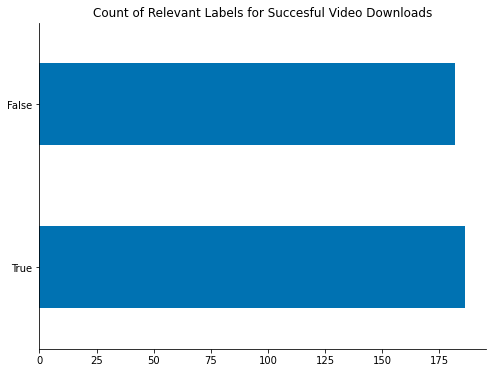

In [7]:
#check class labels of successful downloads
downloads_df = url_dataset.loc[url_dataset['renamed_title'].isin(succesful_downloads)]

print(downloads_df.relevant.value_counts(), '\n')
plt.style.use('seaborn-colorblind')
ax = downloads_df.relevant.value_counts().plot(kind='barh', \
                                               title='Count of Relevant Labels for Succesful Video Downloads', \
                                               figsize=(8,6));

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

`Class counts are roughly equal, though slightly less (-15ish) videos of original dataset`

In [5]:
# downloads_df = downloads_df.drop(columns=['Unnamed: 0'])
# downloads_df

,video_id,url,title,license,relevant,renamed_title
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4
...,...,...,...,...,...,...
363,K1RzTZI9p5U,https://youtu.be/K1RzTZI9p5U,El Secreto del Sueño: Un mito aborigen austral...,creativeCommon,False,video_0425.mp4
364,XIhVygewzsM,https://youtu.be/XIhVygewzsM,The World&#39;s Strangest Capital Cities,creativeCommon,False,video_0427.mp4
365,nYGZBz5iqe8,https://youtu.be/nYGZBz5iqe8,#HealyHustle | The Elephant Story - What do El...,creativeCommon,False,video_0428.mp4
366,uL8pTh8exNI,https://youtu.be/uL8pTh8exNI,하와이 캠핑 빅아일랜드 스펜서 비치파크 (Feat. 마할로의 시크릿 비치도 공개합니다),creativeCommon,False,video_0429.mp4


In [50]:
# downloads_df.to_csv(workspace_path + '/downloaded_videos.csv', index=False)
# downloads_df.to_csv('/workspace/youtube-humpback-whale-classifier/data/downloaded_videos.csv', index=False)

## Full-length Video Durations

In [7]:
#the df of the videos that were actually downloaded into the workspace
downloads_df = pd.read_csv(workspace_path + '/downloaded_videos.csv')
downloads_df.head()

,video_id,url,title,license,relevant,renamed_title
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4


In [6]:
def get_num_video_frames(video_title, clips=False):
    if clips == False:
        data = cv2.VideoCapture(workspace_path + '/videos/' + video_title)
    else:
        data = cv2.VideoCapture(workspace_path + '/video_clips/' + video_title)
        
    return data.get(cv2.CAP_PROP_FRAME_COUNT)
    
def get_video_duration(video_title, silent = True, clips=False):

    #get video
    if clips == False:
        data = cv2.VideoCapture(workspace_path + '/videos/' + video_title)
    else:
        data = cv2.VideoCapture(workspace_path + '/video_clips/' + video_title)
        
    # count the number of frames
    frames = data.get(cv2.CAP_PROP_FRAME_COUNT)
    fps = int(data.get(cv2.CAP_PROP_FPS))

    # calculate duration of the video
    seconds = int(frames / fps)
    video_time = str(datetime.timedelta(seconds=seconds))

    if silent == False:
        print("duration in seconds:", seconds)
        print("video time:", video_time)
    
    return seconds, video_time

In [53]:
#get durations for videos that successfully downloaded
video_duration_seconds = []
video_duration_times = []
video_frame_counts = []

for video in downloads_df.renamed_title:
    frames = get_num_video_frames(video)
    seconds, video_time = get_video_duration(video)
    video_duration_seconds.append(seconds)
    video_duration_times.append(video_time)
    video_frame_counts.append(frames)

print('Done collection video duration info.')

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x6689080] Unknown projection type: ytmp
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x6689080] Unknown projection type: ytmp
[av1 @ 0x6627ec0] Your platform doesn't suppport hardware accelerated AV1 decoding.
[av1 @ 0x6627ec0] Failed to get pixel format.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av1 @ 0x6627ec0] Missing Sequence Header.
[av

Done collection video duration info.


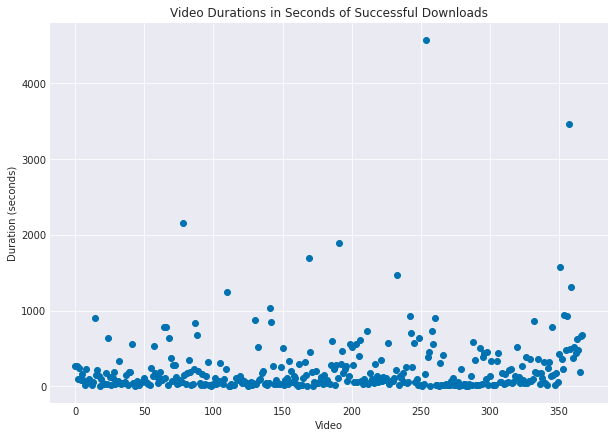

In [54]:
#scatterplot of video durations in seconds
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,7))
plt.scatter([i for i in range(0, len(downloads_df.renamed_title))], video_duration_seconds)
plt.xlabel('Video')
plt.ylabel('Duration (seconds)')
plt.title('Video Durations in Seconds of Successful Downloads');

Mean Video Duration (seconds):    230.51902173913044
Median Video Duration (seconds):  100.0
Max Video Duration (seconds):     4572
Min Video Duration (seconds):     4 



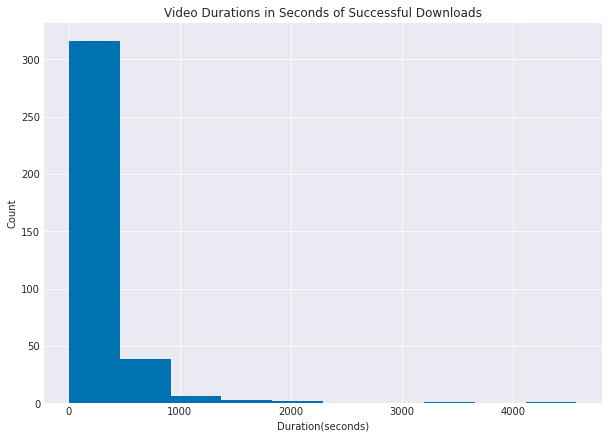

In [55]:
#histogram of video durations in seconds
print('Mean Video Duration (seconds):   ', np.array(video_duration_seconds).mean())
print('Median Video Duration (seconds): ', np.median(np.array(video_duration_seconds)))
print('Max Video Duration (seconds):    ', np.array(video_duration_seconds).max())
print('Min Video Duration (seconds):    ', np.array(video_duration_seconds).min(), '\n')

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,7))
plt.hist(video_duration_seconds)
plt.xlabel('Duration(seconds)')
plt.ylabel('Count')
plt.title('Video Durations in Seconds of Successful Downloads');

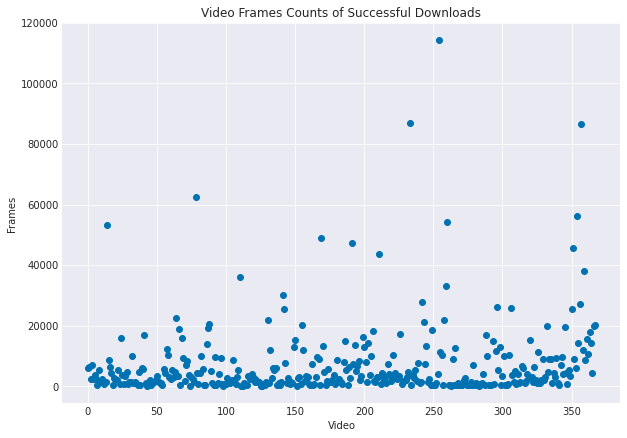

In [57]:
#scatterplot of video frames
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,7))
plt.scatter([i for i in range(0, len(downloads_df.renamed_title))], video_frame_counts)
plt.xlabel('Video')
plt.ylabel('Frames')
plt.title('Video Frames Counts of Successful Downloads');

Mean Num of Video Frames:    7114.809782608696
Median Num of Video Frames:  2959.5
Max Num of Video Frames:     114319.0
Min Num of Video Frames:     42.0 



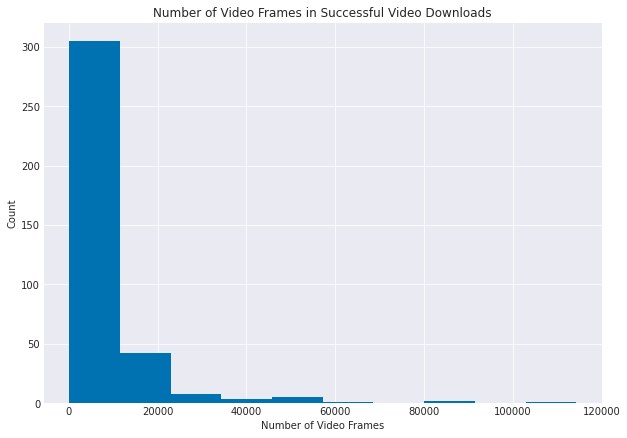

In [56]:
#histogram of video frames
print('Mean Num of Video Frames:   ', np.array(video_frame_counts).mean())
print('Median Num of Video Frames: ', np.median(np.array(video_frame_counts)))
print('Max Num of Video Frames:    ', np.array(video_frame_counts).max())
print('Min Num of Video Frames:    ', np.array(video_frame_counts).min(), '\n')

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,7))
plt.hist(video_frame_counts)
plt.xlabel('Number of Video Frames')
plt.ylabel('Count')
plt.title('Number of Video Frames in Successful Video Downloads');

Decision: Use the Median number of frames available in our dataset to cut down videos. This means we should collect `2960 frames from each video`, and pad those that don't meet this count by replicating the middle frame. 

Note: Since we did not identify and narrow down videos to occurence intervals, the possibility that the extracted frames skip over the humpback whale encounter exists. Additionally, there might be more noise included if the whale encounter in the relevant videos only makes up a small portion of the overall video.  

# Video Clip Durations

In [3]:
#load data of successful downloads
downloads_df = pd.read_csv(workspace_path + '/downloaded_videos.csv')
downloads_df.head()

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end,duration
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4,10,25,266.0
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4,44,59,269.0
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4,5,20,102.0
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4,160,175,238.0
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4,0,15,83.0


In [7]:
#get durations for videos that successfully downloaded
clip_duration_seconds = []
clip_frame_counts = []

for video in downloads_df.renamed_title:
    
    video_clip = video.replace('_', '_clip_')
    
    frames = get_num_video_frames(video_clip, clips=True)
    seconds, video_time = get_video_duration(video_clip, clips=True)
    
    clip_duration_seconds.append(seconds)
    clip_frame_counts.append(frames)

print('Done collection video clip duration info.')

[av1 @ 0x35919c0] Your platform doesn't suppport hardware accelerated AV1 decoding.
[av1 @ 0x35919c0] Failed to get pixel format.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x35919c0] Missing Sequence Header.
[av1 @ 0x3

Done collection video clip duration info.


Mean Video Duration (seconds):    16.255434782608695
Median Video Duration (seconds):  16.0
Max Video Duration (seconds):     22
Min Video Duration (seconds):     4 



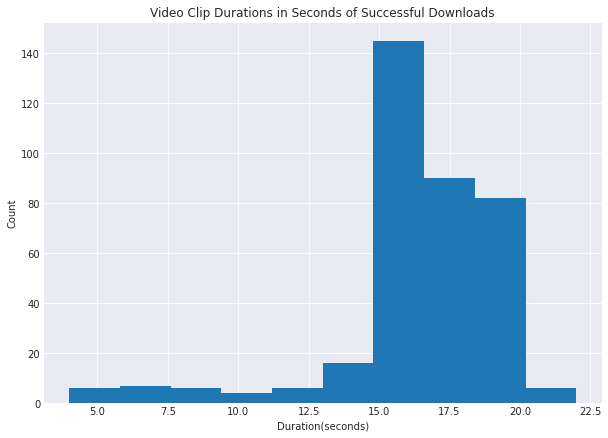

In [12]:
#histogram of video clip durations in seconds
print('Mean Video Duration (seconds):   ', np.array(clip_duration_seconds).mean())
print('Median Video Duration (seconds): ', np.median(np.array(clip_duration_seconds)))
print('Max Video Duration (seconds):    ', np.array(clip_duration_seconds).max())
print('Min Video Duration (seconds):    ', np.array(clip_duration_seconds).min(), '\n')

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,7))
plt.hist(clip_duration_seconds)
plt.xlabel('Duration(seconds)')
plt.ylabel('Count')
plt.title('Video Clip Durations in Seconds of Successful Downloads');

Mean Num of Video Frames:    499.7527173913044
Median Num of Video Frames:  467.5
Max Num of Video Frames:     1287.0
Min Num of Video Frames:     42.0 



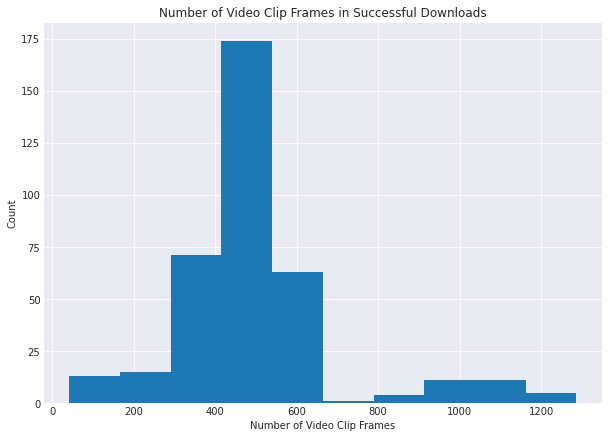

In [13]:
#histogram of video clip frame counts
print('Mean Num of Video Frames:   ', np.array(clip_frame_counts).mean())
print('Median Num of Video Frames: ', np.median(np.array(clip_frame_counts)))
print('Max Num of Video Frames:    ', np.array(clip_frame_counts).max())
print('Min Num of Video Frames:    ', np.array(clip_frame_counts).min(), '\n')

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,7))
plt.hist(clip_frame_counts)
plt.xlabel('Number of Video Clip Frames')
plt.ylabel('Count')
plt.title('Number of Video Clip Frames in Successful Downloads');

# Visualizing Dataset + Video Clips with WandB

In [7]:
import wandb

wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [13]:
#visualize video clips and data with wandb
wandb.init(project="whale-classification-inception", name="tables")

clip_folder = workspace_path + "/video_clips/"
downloads_df_wandb = downloads_df.copy(deep=True)

#get wandb video objects
for i, row in downloads_df.iterrows():
    video_clip = clip_folder + row['renamed_title'].replace('_', '_clip_')
    downloads_df_wandb.at[i, ('wandb_clip')] = wandb.Video(video_clip, fps=4, format="gif")

#create wandb table with all information
table = wandb.Table(dataframe=downloads_df_wandb)
wandb.log({"downloads_df": table})
wandb.finish()

#save df with wandb video clip objects 
downloads_df_copy.to_csv('/workspace/youtube-humpback-whale-classifier/data/downloads_df_wandb.csv', index=False)

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end,duration,wandb_clip
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4,10,25,266.0,<wandb.sdk.data_types.video.Video object at 0x...
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4,44,59,269.0,<wandb.sdk.data_types.video.Video object at 0x...
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4,5,20,102.0,<wandb.sdk.data_types.video.Video object at 0x...
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4,160,175,238.0,<wandb.sdk.data_types.video.Video object at 0x...
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4,0,15,83.0,<wandb.sdk.data_types.video.Video object at 0x...
...,...,...,...,...,...,...,...,...,...,...
363,K1RzTZI9p5U,https://youtu.be/K1RzTZI9p5U,El Secreto del Sueño: Un mito aborigen austral...,creativeCommon,False,video_0425.mp4,117,132,620.0,<wandb.sdk.data_types.video.Video object at 0x...
364,XIhVygewzsM,https://youtu.be/XIhVygewzsM,The World&#39;s Strangest Capital Cities,creativeCommon,False,video_0427.mp4,47,62,475.0,<wandb.sdk.data_types.video.Video object at 0x...
365,nYGZBz5iqe8,https://youtu.be/nYGZBz5iqe8,#HealyHustle | The Elephant Story - What do El...,creativeCommon,False,video_0428.mp4,139,154,189.0,<wandb.sdk.data_types.video.Video object at 0x...
366,uL8pTh8exNI,https://youtu.be/uL8pTh8exNI,하와이 캠핑 빅아일랜드 스펜서 비치파크 (Feat. 마할로의 시크릿 비치도 공개합니다),creativeCommon,False,video_0429.mp4,283,298,664.0,<wandb.sdk.data_types.video.Video object at 0x...


In [14]:
#load in saved df with wandb video clip objects for faster rendering
downloads_df_wandb = pd.read_csv('/workspace/youtube-humpback-whale-classifier/data/downloads_df_wandb.csv')

wandb.init(project="whale-classification-inception", name="tables")

table = wandb.Table(dataframe=downloads_df_wandb)

wandb.log({"downloads_df": table})

wandb.finish()